
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [5]:

import numpy as np
import matplotlib.pyplot as plt


In [6]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it

class StandardScalerManual:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        # Compute mean and standard deviation for each feature
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        # Avoid division by zero
        return (X - self.mean) / (self.std + 1e-8)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)



In [7]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionScratch:
    def __init__(self, lr=0.01, iterations=1000, lambda_reg=0.1):
        self.lr = lr
        self.iterations = iterations
        self.lambda_reg = lambda_reg
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        m, n = X.shape

        # Initialize parameters
        self.w = np.zeros(n)
        self.b = 0

        for i in range(self.iterations):
            # Prediction
            y_pred = np.dot(X, self.w) + self.b

            # Compute loss (MSE + L2)
            mse_loss = (1 / (2 * m)) * np.sum((y - y_pred) ** 2)
            l2_loss = (self.lambda_reg / (2 * m)) * np.sum(self.w ** 2)
            loss = mse_loss + l2_loss
            self.losses.append(loss)

            # Gradients
            dw = (-1 / m) * np.dot(X.T, (y - y_pred)) + (self.lambda_reg / m) * self.w
            db = (-1 / m) * np.sum(y - y_pred)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.flatten() + 7 + np.random.randn(100) * 2
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)
model = LinearRegressionScratch(
    lr=0.01,
    iterations=1000,
    lambda_reg=0.1
)

model.fit(X_scaled, y)



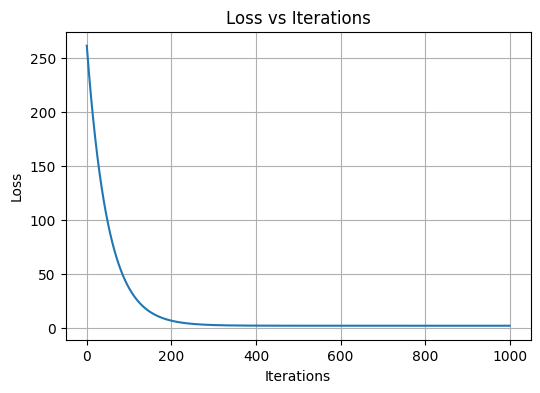

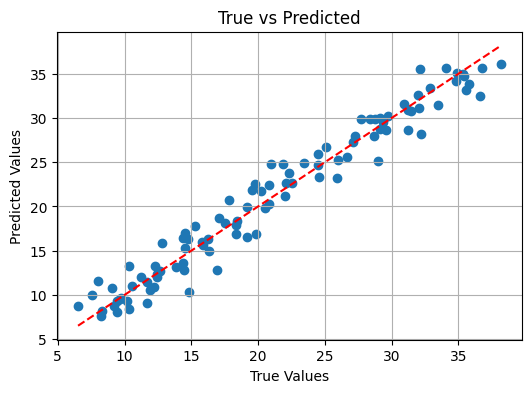

In [8]:
plt.figure(figsize=(6,4))
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.grid()
plt.show()

y_pred = model.predict(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.grid()
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [9]:

import numpy as np
import matplotlib.pyplot as plt



In [10]:

class StandardScalerManual:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / (self.std + 1e-8)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

class LogisticRegressionScratch:
    def __init__(self, lr=0.01, iterations=1000, lambda_reg=0.1):
        self.lr = lr
        self.iterations = iterations
        self.lambda_reg = lambda_reg
        self.w = None
        self.b = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape

        # Initialize parameters
        self.w = np.zeros(n)
        self.b = 0

        for i in range(self.iterations):
            # Linear combination
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)

            # Compute loss
            eps = 1e-8  # for numerical stability
            bce_loss = -(1 / m) * np.sum(
                y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps)
            )
            l2_loss = (self.lambda_reg / (2 * m)) * np.sum(self.w ** 2)
            loss = bce_loss + l2_loss
            self.losses.append(loss)

            # Gradients
            dw = (1 / m) * np.dot(X.T, (y_pred - y)) + (self.lambda_reg / m) * self.w
            db = (1 / m) * np.sum(y_pred - y)

            # Parameter update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


In [11]:
np.random.seed(0)

# Two-class synthetic dataset
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LogisticRegressionScratch(
    lr=0.1,
    iterations=1000,
    lambda_reg=0.1
)

model.fit(X_scaled, y)


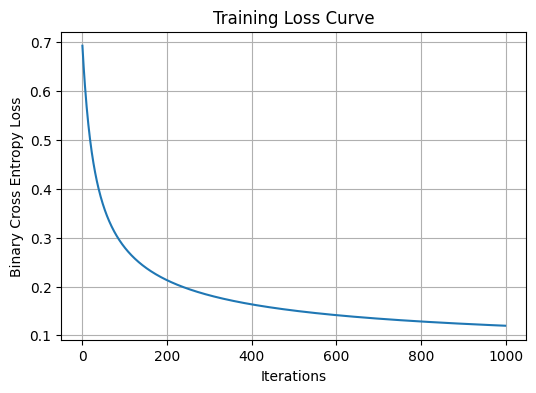

Final Training Accuracy: 0.995


In [12]:
plt.figure(figsize=(6,4))
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.grid()
plt.show()

y_pred = model.predict(X_scaled)
accuracy = np.mean(y_pred == y)

print("Final Training Accuracy:", accuracy)



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [13]:

import numpy as np
import matplotlib.pyplot as plt


In [16]:
class KMeansMatrixClustering:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.assignment_table = None
        self.cookbook = None

    def fit(self, M):
        n, m = M.shape

        # Flatten matrix values for centroid initialization
        flat_values = M.flatten()

        # Randomly initialize centroids from matrix values
        np.random.seed(42)
        self.centroids = np.random.choice(flat_values, self.k, replace=False)

        # Assignment table (same shape as M)
        self.assignment_table = np.zeros((n, m), dtype=int)

        for iteration in range(self.max_iters):
            # Step 1: Assignment
            for i in range(n):
                for j in range(m):
                    distances = np.abs(M[i, j] - self.centroids)
                    self.assignment_table[i, j] = np.argmin(distances)

            # Step 2: Update centroids
            new_centroids = np.zeros(self.k)
            counts = np.zeros(self.k)

            for i in range(n):
                for j in range(m):
                    cluster = self.assignment_table[i, j]
                    new_centroids[cluster] += M[i, j]
                    counts[cluster] += 1

            # Avoid division by zero
            for c in range(self.k):
                if counts[c] != 0:
                    new_centroids[c] /= counts[c]
                else:
                    # If a cluster has no assigned points, keep its centroid the same
                    new_centroids[c] = self.centroids[c]

            # Check convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        # Build cookbook after final assignments
        self.cookbook = {i: [] for i in range(self.k)}
        for i in range(n):
            for j in range(m):
                cluster_label = self.assignment_table[i, j]
                self.cookbook[cluster_label].append((i, j))

np.random.seed(0)
M = np.random.randint(0, 100, size=(5, 5))
print("Input Matrix M:\n", M)

kmeans = KMeansMatrixClustering(k=3, max_iters=100)
kmeans.fit(M)

Input Matrix M:
 [[44 47 64 67 67]
 [ 9 83 21 36 87]
 [70 88 88 12 58]
 [65 39 87 46 88]
 [81 37 25 77 72]]


In [17]:
print("Assignment Table:\n", kmeans.assignment_table)

print("Centroids:\n", kmeans.centroids)

print("Cookbook:")
for cluster, positions in kmeans.cookbook.items():
    print(f"Cluster {cluster}: {positions}")


Assignment Table:
 [[1 1 2 2 2]
 [0 2 0 1 2]
 [2 2 2 0 1]
 [2 1 2 1 2]
 [2 1 0 2 2]]
Centroids:
 [16.75       43.85714286 77.42857143]
Cookbook:
Cluster 0: [(1, 0), (1, 2), (2, 3), (4, 2)]
Cluster 1: [(0, 0), (0, 1), (1, 3), (2, 4), (3, 1), (3, 3), (4, 1)]
Cluster 2: [(0, 2), (0, 3), (0, 4), (1, 1), (1, 4), (2, 0), (2, 1), (2, 2), (3, 0), (3, 2), (3, 4), (4, 0), (4, 3), (4, 4)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
